<center><H1>Prediction for the change in Job </H1></center>


### ABDUL REHMAN (SP19-BSCS-0103)
### MUHAMMAD WALEED ANSARI (SP20-BSCS-1005)



**Introduction**:
The situation set up by the enlightening record is that an association which is dynamic in the Tremendous Data and Data Examination space is offer in courses to a piece of its laborers. The association is offer paid getting ready to their agents. Luckily, different agents have pursued these paid work trainings. In any case, they have been running into the circumstance where ensuing to completing a course they wind up advancing associations.

Association needs to know which of these candidates are truly needs to work for the association following getting ready or searching for another work since it assists with reducing the expense and time in basically the same manner as planning or orchestrating the courses and request of the up-and-comers. The given dataset embodies diverse assessed factors, for example, the measure of the readiness being offered, the preparation level of the contender, the headway rundown of the city for which the association is found, etc The data was collected with felt that it could conceivable to expect whether a solitary will leave the association just coming about to finishing the paid preparation.

**The goal**: Is to be choose of these applicants that really needs to work for the organization ensuing to preparing or looking for new business and make human legitimate bits of knowledge.

#  Libraries

In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Standard Imports
import pandas as pd
import numpy as np

# Plot graph
import matplotlib.pyplot as plt
import seaborn as sns 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from collections import Counter

# Packages for Data Preprocessing
import copy
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

# Packages for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Packages for Models
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

import warnings
warnings.filterwarnings("ignore")

#  Import Data and look at the data

In [3]:
df = pd.read_csv("hr_data.csv")
df.head() #First 5 rows

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36       1  
1              47       0  
2              83       0  
3              52       1  
4               8       0

In [4]:
# Data shape
df.shape 

(19158, 14)

**Data contains 19158 Observation and 14 Features.**
> Features
* enrollee_id : Unique ID for candidate 
* city: City code
* city_ development _index : Developement index of the city (scaled)
* gender: Gender of candidate
* relevent_experience: Relevant experience of candidate
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of candidate
* major_discipline :Education major discipline of candidate
* experience: Candidate total experience in years
* company_size: No of employees in current employer's company
* company_type : Type of current employer
* lastnewjob: Difference in years between previous job and current job
* training_hours: training hours completed
* target: 0 – Not looking for job change, 1 – Looking for a job change

**Target is** (target)

# Exploratory Data Analysis(EDA)

In [5]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [6]:
# Describing a Numerical Data   
df.describe()

enrollee_id  city_development_index  training_hours        target
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     9616.292592                0.123362       60.058462      0.432647
min        1.000000                0.448000        1.000000      0.000000
25%     8554.250000                0.740000       23.000000      0.000000
50%    16982.500000                0.903000       47.000000      0.000000
75%    25169.750000                0.920000       88.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000

In [7]:
# unique value in last_new_job
df.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [8]:
# value counts in last_new_job
df.last_new_job.value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

# Prepare the data Data Preprocessing


## Unnecessary columns



We consider that this columns are not useful to use as feature, therefore We delete it

In [9]:
# Remove enrollee_id from data
df.drop('enrollee_id', inplace=True, axis=1)

## Deal with NaN values and Encode Categorical Features

In [10]:
df.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [11]:
# Prepare the data for lambda and encode
df1=copy.deepcopy(df)
cols=['city_development_index','training_hours','target']
for i in df1.columns:
    if i not in cols:
        df1[i]=df1[i].map(str)
df1.drop(columns=cols,inplace=True)

In [12]:
d = defaultdict(LabelEncoder)
df1 = df1.apply(lambda x: d[x.name].fit_transform(x))

In [13]:
df1[cols]=df[cols]
df = df1.copy()

In [14]:
df.head()

city  gender  relevent_experience  enrolled_university  education_level  \
0     5       1                    0                    3                0   
1    77       1                    1                    3                0   
2    64       3                    1                    0                0   
3    14       3                    1                    2                0   
4    50       1                    0                    3                2   

   major_discipline  experience  company_size  company_type  last_new_job  \
0                 5          21             8             6             0   
1                 5           6             3             5             4   
2                 5          15             8             6             6   
3                 1          20             8             5             6   
4                 5          21             3             1             3   

   city_development_index  training_hours  target  
0                   0.920              36       1  
1                   0.776              47       0  
2                   0.624              83       0  
3                   0.789              52       1  
4                   0.767               8       0

In [15]:
df.shape

(19158, 13)

In [16]:
df.isnull().sum()

city                      0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
city_development_index    0
training_hours            0
target                    0
dtype: int64

## Feature Selection

**Correlation in Data**

In [17]:
df.corr()

city    gender  relevent_experience  \
city                    1.000000  0.049546             0.006154   
gender                  0.049546  1.000000             0.099137   
relevent_experience     0.006154  0.099137             1.000000   
enrolled_university    -0.079245 -0.104901            -0.375810   
education_level         0.006448  0.059195             0.111214   
major_discipline        0.105038  0.065875             0.095723   
experience             -0.042545  0.001815            -0.008235   
company_size            0.045113  0.062269             0.334517   
company_type            0.019465  0.044373             0.188282   
last_new_job            0.001763  0.067027             0.228555   
city_development_index -0.326104 -0.154868            -0.059808   
training_hours          0.009537  0.001057            -0.011566   
target                  0.056233  0.067676             0.128430   

                        enrolled_university  education_level  \
city                              -0.079245         0.006448   
gender                            -0.104901         0.059195   
relevent_experience               -0.375810         0.111214   
enrolled_university                1.000000         0.056155   
education_level                    0.056155         1.000000   
major_discipline                  -0.146363         0.190048   
experience                         0.024657         0.015183   
company_size                      -0.224005         0.066604   
company_type                      -0.093797         0.036840   
last_new_job                      -0.050627         0.121864   
city_development_index             0.171612         0.039749   
training_hours                     0.002530        -0.005852   
target                            -0.149475        -0.075754   

                        major_discipline  experience  company_size  \
city                            0.105038   -0.042545      0.045113   
gender                          0.065875    0.001815      0.062269   
relevent_experience             0.095723   -0.008235      0.334517   
enrolled_university            -0.146363    0.024657     -0.224005   
education_level                 0.190048    0.015183      0.066604   
major_discipline                1.000000   -0.004304      0.078610   
experience                     -0.004304    1.000000      0.014640   
company_size                    0.078610    0.014640      1.000000   
company_type                    0.059102    0.017863      0.264774   
last_new_job                    0.096016    0.056310      0.168683   
city_development_index         -0.101260    0.035141     -0.090018   
training_hours                  0.007497   -0.005202      0.001223   
target                         -0.005513   -0.006335      0.207292   

                        company_type  last_new_job  city_development_index  \
city                        0.019465      0.001763               -0.326104   
gender                      0.044373      0.067027               -0.154868   
relevent_experience         0.188282      0.228555               -0.059808   
enrolled_university        -0.093797     -0.050627                0.171612   
education_level             0.036840      0.121864                0.039749   
major_discipline            0.059102      0.096016               -0.101260   
experience                  0.017863      0.056310                0.035141   
company_size                0.264774      0.168683               -0.090018   
company_type                1.000000      0.171732               -0.030946   
last_new_job                0.171732      1.000000               -0.024093   
city_development_index     -0.030946     -0.024093                1.000000   
training_hours             -0.013025     -0.012885                0.001920   
target                      0.118226     -0.001687               -0.341665   

                        training_hours    target  
city                          0.009537  0.056233  
gender          

**Heatmap**

In [18]:
# Plotly code to make a heatmap
x=list(df.corr().columns)
y=list(df.corr().index)
values=np.array(df.corr().values)

fig = go.Figure(data=go.Heatmap( z=values, x=x, y=y, hoverongaps = False))
fig.update_layout(
    title={
        'text': "Correlation between features",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

**Conclusion**: From the above heatmap we can clearly observe that the target has a high dependance on the city_development_index which means candidates from city with higher amount of development index don't tend to change their jobs (corr is negative).



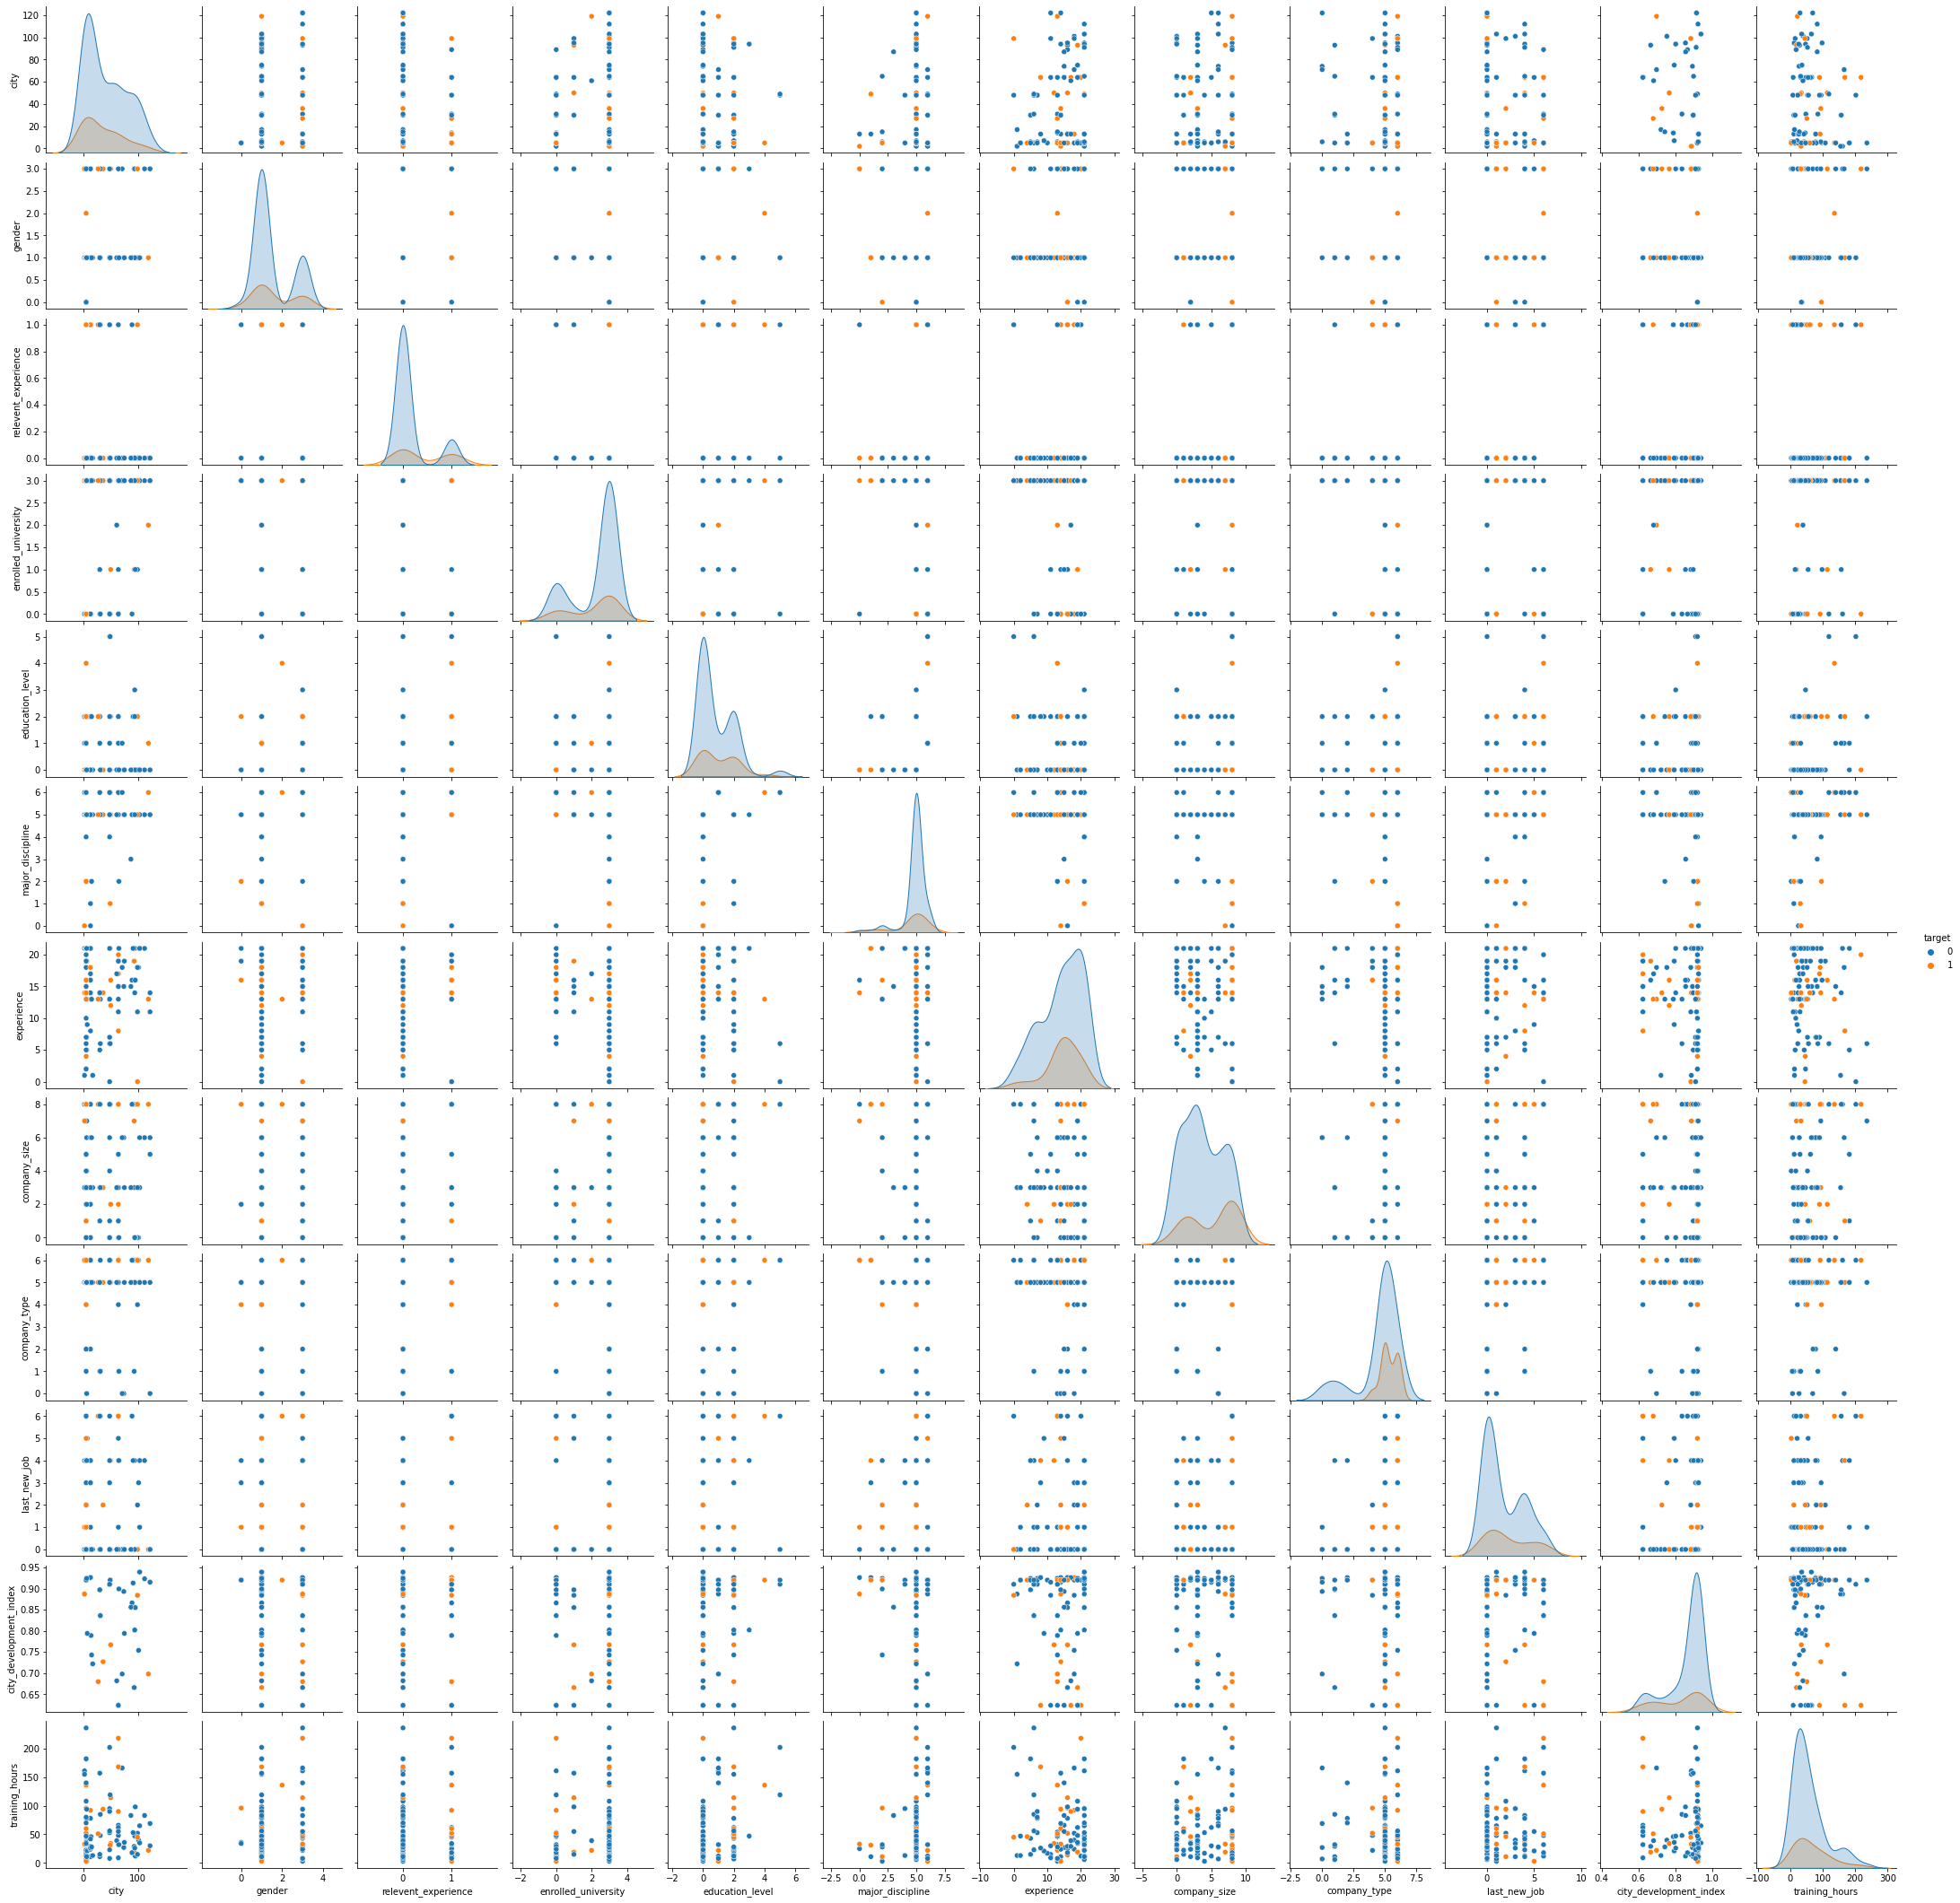

In [19]:
sns.pairplot(data=df.sample(100),hue='target')

# The 10 features that are selected are :
*   city
*   city_development_index
*   gender
*   relevent_experience
*   enrolled_university
*   education_level
*   experience
*   company_size
*   company_type
*   training_hours


In [20]:
# Selecting top 10 features from the data (use "k=10" are the best num that fit to my models)
p=SelectKBest(score_func=f_classif,k=10)
fit=p.fit(df.drop(columns=['target']), df['target'])

In [21]:
features=fit.transform(df.drop(columns=['target']))
print(features[:5,:])
df.head()

[[ 5.     1.     0.     3.     0.    21.     8.     6.     0.92  36.   ]
 [77.     1.     1.     3.     0.     6.     3.     5.     0.776 47.   ]
 [64.     3.     1.     0.     0.    15.     8.     6.     0.624 83.   ]
 [14.     3.     1.     2.     0.    20.     8.     5.     0.789 52.   ]
 [50.     1.     0.     3.     2.    21.     3.     1.     0.767  8.   ]]


city  gender  relevent_experience  enrolled_university  education_level  \
0     5       1                    0                    3                0   
1    77       1                    1                    3                0   
2    64       3                    1                    0                0   
3    14       3                    1                    2                0   
4    50       1                    0                    3                2   

   major_discipline  experience  company_size  company_type  last_new_job  \
0                 5          21             8             6             0   
1                 5           6             3             5             4   
2                 5          15             8             6             6   
3                 1          20             8             5             6   
4                 5          21             3             1             3   

   city_development_index  training_hours  target  
0                   0.920              36       1  
1                   0.776              47       0  
2                   0.624              83       0  
3                   0.789              52       1  
4                   0.767               8       0

**Splitting the data**

In [22]:
X=df[["city" , "city_development_index","gender","relevent_experience","enrolled_university","education_level","experience","company_size","company_type", "training_hours"]]
y=df['target']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Models

#### RandomForestClassifier Model

In [24]:
# create and fit RandomForestClassifier model  
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
#predict
pred = rfc.predict(X_test)
pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [26]:
rfc_acc= accuracy_score(y_test, pred)
print('The accuracy score using the RandomForestClassifier (befor resample) is :',rfc_acc)

The accuracy score using the RandomForestClassifier (befor resample) is : 0.7813152400835073


In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2880
           1       0.57      0.47      0.51       952

    accuracy                           0.78      3832
   macro avg       0.70      0.68      0.69      3832
weighted avg       0.77      0.78      0.77      3832



## Oversampling using SMOTE

**The target feature is clearly imbalanced,The distribution of target has a lot more samples in '0' than in '1'.**

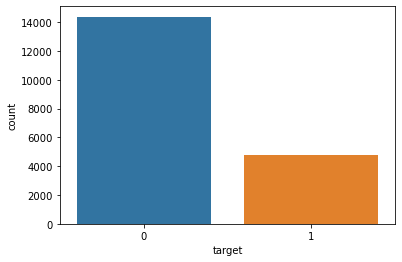

In [28]:
sns.countplot(df['target']);

**Let's try to increase data in balanced manner using Synthetic Minority Oversampling Technique (SMOTE)**

In [29]:
smote=SMOTE(random_state=60)
X, y=smote.fit_resample(X,y)

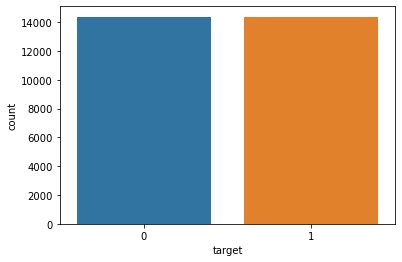

In [30]:
sns.countplot(y);

**Now the number of samples per class in target are equal, so the predictor can have a higher accuracy.**

Data Balanced Successfully 

**Splitting the data after SMOTE**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### RandomForestClassifier Model

In [32]:
## create and fit RandomForestClassifier model after SMOTE
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
#predict
pred = rfc.predict(X_test)
pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [34]:
rfc_acc= accuracy_score(y_test, pred)
print('The accuracy score using the RandomForestClassifier (after resample) is :',rfc_acc)

The accuracy score using the RandomForestClassifier (after resample) is : 0.8284373370415435


In [35]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2877
           1       0.82      0.84      0.83      2876

    accuracy                           0.83      5753
   macro avg       0.83      0.83      0.83      5753
weighted avg       0.83      0.83      0.83      5753



#### DecisionTreeClassifier Model

In [36]:
# create and fit DecisionTreeClassifier model
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
#predict
pred = dtc.predict(X_test)
pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [38]:
dtc_acc= accuracy_score(y_test, pred)
print('The accuracy score with using the decision tree classifier is :',dtc_acc)

The accuracy score with using the decision tree classifier is : 0.7775073874500261


In [39]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      2877
           1       0.77      0.80      0.78      2876

    accuracy                           0.78      5753
   macro avg       0.78      0.78      0.78      5753
weighted avg       0.78      0.78      0.78      5753



#### KNeighborsClassifier Model

In [40]:
# create and fit KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
#predict
pred = knn.predict(X_test)

In [42]:
#KNN accuracy score
Knn_acc= accuracy_score(y_test, knn.predict(X_test))
print('The accuracy socre using the KNeighborsClassifier is :',Knn_acc)

The accuracy socre using the KNeighborsClassifier is : 0.7884581957239701


In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76      2877
           1       0.73      0.91      0.81      2876

    accuracy                           0.79      5753
   macro avg       0.81      0.79      0.79      5753
weighted avg       0.81      0.79      0.79      5753



## Evaluation

**Comparing Model Accuracy**

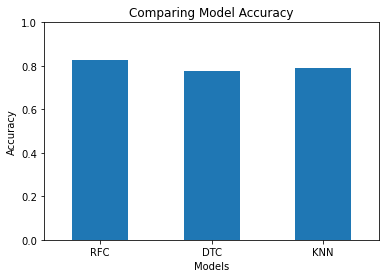

In [44]:
pd.DataFrame([rfc_acc, dtc_acc, Knn_acc]).plot.bar();
plt.xticks(np.arange(3),('RFC','DTC','KNN'))
plt.legend().remove()
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation = 0)
plt.title('Comparing Model Accuracy');

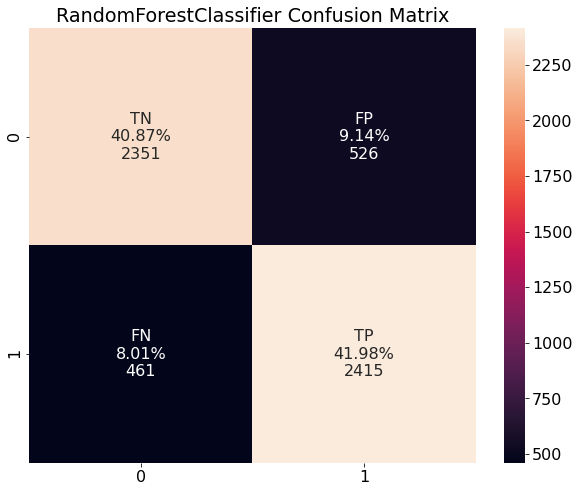

In [45]:
#RandomForestClassifier confusion matrix
y_pred = rfc.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='').set_title("RandomForestClassifier Confusion Matrix");

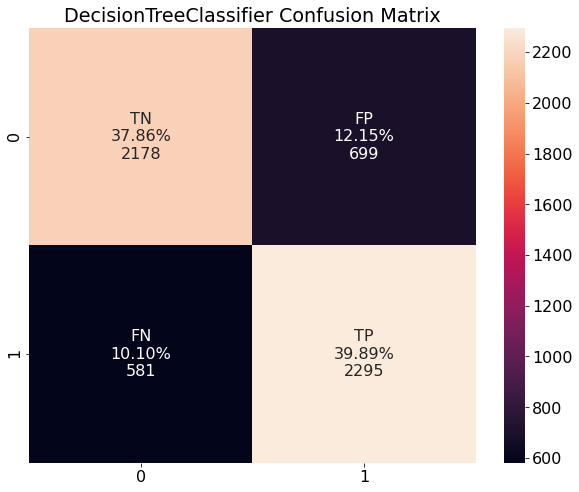

In [46]:
#DecisionTreeClassifier confusion matrix
y_pred = dtc.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
group_counts = ['{0:0.0f}'.format(value) for value in cf.flatten()]

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='').set_title("DecisionTreeClassifier Confusion Matrix");

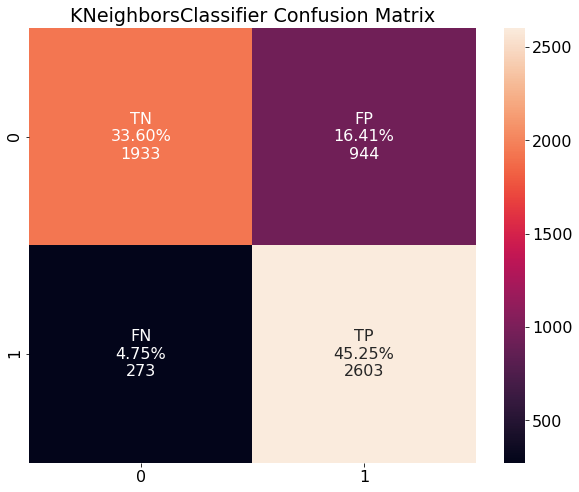

In [47]:
#KNeighborsClassifier confusion matrix
y_pred = knn.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
group_counts = ['{0:0.0f}'.format(value) for value in cf.flatten()]

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='').set_title("KNeighborsClassifier Confusion Matrix");

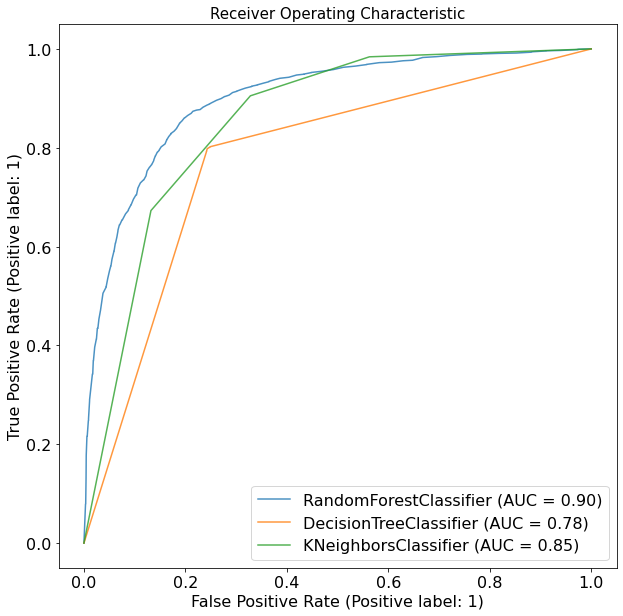

In [48]:
# ROC/AUC curve
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_title('Receiver Operating Characteristic',size=15)
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8, name='RandomForestClassifier')
tree_disp = plot_roc_curve(dtc, X_test, y_test,  ax=ax, alpha=0.8, name='DecisionTreeClassifier')
knn_disp =  plot_roc_curve(knn, X_test, y_test,  ax=ax, alpha=0.8, name='KNeighborsClassifier')



In [49]:
    #use to show report in Browser
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
from dataprep.eda import create_report
report = create_report(df, title='AI Report')      
report.show_browser()

  0%|                                                                                         | 0/1600 [00:00<…

In [50]:
pip install -U dataprep

In [51]:
pip install 1OS

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install os-sys